In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(777)
print(tf.__version__)
print(np.__version__)

2.3.0
1.18.5


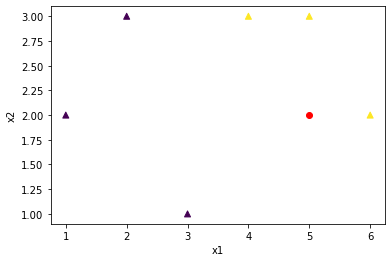

In [36]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1, x2, c = colors, marker = '^')
plt.scatter(x_test[0][0], x_test[0][1], c = "red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [9]:
dataset

<TensorSliceDataset shapes: ((2,), (1,)), types: (tf.float32, tf.float32)>

In [11]:
W = tf.Variable(tf.zeros([2,1]), name = 'weight')
b = tf.Variable(tf.zeros([1]), name = 'bias')

In [12]:
W

<tf.Variable 'weight:0' shape=(2, 1) dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [13]:
B

NameError: name 'B' is not defined

In [14]:
b

<tf.Variable 'bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [22]:
#sigmoid 함수 정의
def logistic_regression(features):
    hypothesis = tf.divide(1, 1 + tf.exp(-tf.matmul(features, W) + b))
    return hypothesis

In [23]:
#loss function = logistic regression 의 cost 함수
def loss_fn(hypo, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypo) + (1 - labels)*tf.math.log(1 - hypo))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [38]:
#sigmoid 함수를 통한 예측값을 통해 0 or 1의 값을 계산 후
#실제값과 비교 후 정확도를 측정한다
def accuracy_fn(hypo, labels):
    predicted = tf.cast(hypo > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

In [25]:
#주어진 변수에 대한 gradient를 계산하여 단계뼐로 tape에 기록한다.
def grad(features, labels):
    with tf.GradientTape() as tape:
        hypo = logistic_regression(features)
        loss_value = loss_fn(hypo, labels)
    return tape.gradient(loss_value, [W,b])

In [27]:
#설정한 epoch 만큼 학습을 시킨다

EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels in iter(dataset.batch(len(x_train))):
        hypo = logistic_regression(features)
        grads = grad(features,labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypo,labels)))

Iter: 0, Loss: 0.6874
Iter: 100, Loss: 0.5776
Iter: 200, Loss: 0.5349
Iter: 300, Loss: 0.5054
Iter: 400, Loss: 0.4838
Iter: 500, Loss: 0.4671
Iter: 600, Loss: 0.4535
Iter: 700, Loss: 0.4420
Iter: 800, Loss: 0.4319
Iter: 900, Loss: 0.4228
Iter: 1000, Loss: 0.4144


In [39]:
#x_test, y_test로 테스트 해본다

test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test) > 0.5, dtype=tf.int32)))  
print("Testset Accuracy: {:.4f}".format(test_acc))

Test Result = [[1]]
Testset Accuracy: 1.0000


In [32]:
x_test

[[5, 2]]

In [33]:
y_test

[[1]]